In [10]:
#Code and data from the article "Black hole information turbulence and the Hubble tension"
#Copyright (C) 2025  Juan Luis Cabrera Fernández

#This project is licensed under the terms of the Attribution-NonCommercial-ShareAlike 4.0 International - Creative Commons licence (CC BY-NC-SA 4.0). 
# https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en

# JLCF: 22/01/2025 : This code builds Figures E3 and E4
# Loads "dims_ReglaCascada_iter27.txt" with the cascade calculated with eqs. 4-6

In [8]:
# Adding julia packages
import Pkg; 

Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("DataFrames")
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [11]:
# Loading the cascade calculated with the rules Eq 4-6
# Leo los resultados del cálculo de la cascada utilizando las reglas de las Ec. 4-6
using CSV, DataFrames

filename="dims_ReglaCascada_iter27.txt" 
df = CSV.read(filename, delim=' ', DataFrame,  header=1);

In [12]:
# Course grained (Dcg) and Motif (D) Data
Dcg = df.Dcg;
D = df.D;
n = size(df)[1];

In [13]:
# Dcg successive differences 
dDcg = zeros(Float64,n-1)
for i in 1:n-1
    dDcg[i] = Dcg[i+1] - Dcg[i]
end

x = 1:1:length(Dcg);

## Figure 6 : ED Figure 3

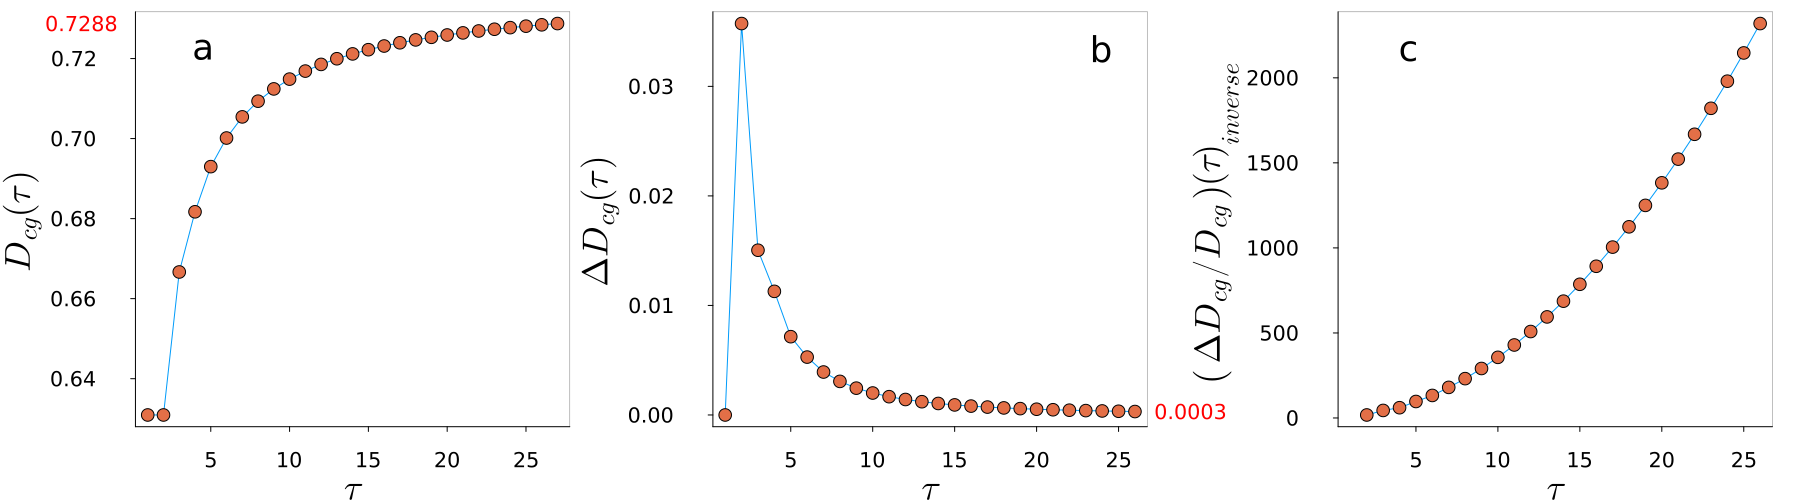

In [14]:
using Plots, Plots.PlotMeasures, LaTeXStrings


CAPITALS=0

if CAPITALS == 1
    notaA = string.("A") 
    notaB = string.("B") 
    notaC = string.("C") 
    notaD = string.("D") 
else
    notaA = string.("a") 
    notaB = string.("b") 
    notaC = string.("c") 
    notaD = string.("d") 
end

plot_font = "Helvetica"
default(fontfamily=plot_font, framestyle=:semi, xtickfont=font(10), ytickfont=font(10), guidefont=font(24), grid=false)


pDcg = plot(Dcg,grid=false)
scatter!(Dcg)
xlabel!(L"\tau")
ylabel!(L"D_{cg}(\tau)")
plot!(legend=:false)
asymp = string.(round.(Dcg[n]; digits=4))
annotate!(-1, Dcg[n], text(asymp, :red, :right, 14))
    annotate!(5, 0.723, Plots.text(notaA, :black, :right, 24))

pdDcg = plot(dDcg,grid=false)
scatter!(dDcg)
xlabel!(L"\tau")
ylabel!(L"\Delta D_{cg}(\tau)") #(L"H(z)")
plot!(legend=:false)
asymp = string.(round.(dDcg[n-1]; digits=4))
annotate!(31.5, dDcg[n-1], text(asymp, :red, :right, 14))
    annotate!(24.5, 0.0334, Plots.text(notaB, :black, :right, 24))

pDcgdDcg = plot(Dcg[1:n-1] ./ dDcg[1:n-1] , grid=false)
scatter!(Dcg[1:n-1] ./ dDcg[1:n-1]  )#, yaxis=:log)
    xlabel!(L"\tau")
    ylabel!(L"\left(\Delta D_{cg}/D_{cg}\right)(\tau)_{inverse}") #(L"H(z)")
plot!(legend=:false)
    annotate!(5, 2175, Plots.text(notaC, :black, :right, 24))

dy=500*1
dx=1800#floor(Int,2*1.618*dy)
#dx=floor(Int,1.618*dy)

plot(pDcg, pdDcg, pDcgdDcg, 
    layout=(1,3),size=(dx,dy),# primary =:false, 
   tickfontsize=14,tick_direction=:out,# top_margin=[1mm 0mm], 
    left_margin=[12mm 7mm],
 right_margin=[5mm 10mm], 
    bottom_margin=9mm, markersize = 7)

In [15]:
#savefig("./E_fig3.png")

In [17]:
# D motif successive differences 
DiffD = zeros(Float64,n-1)
nDiff = length(DiffD)
for i in 1:nDiff
    DiffD[i] = D[i+1] - D[i]
end

## Figure 7 : ED figure 4 

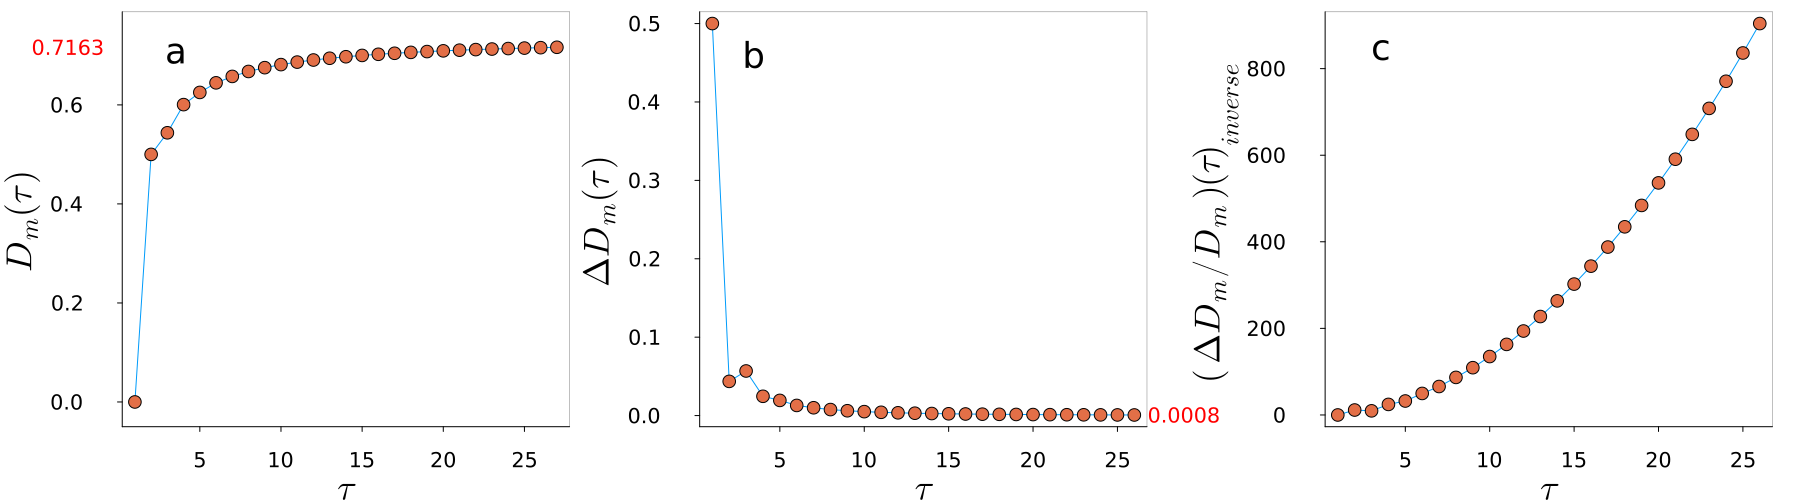

In [18]:
using LaTeXStrings


CAPITALS=0

if CAPITALS == 1
    notaA = string.("A") 
    notaB = string.("B") 
    notaC = string.("C") 
    notaD = string.("D") 
else
    notaA = string.("a") 
    notaB = string.("b") 
    notaC = string.("c") 
    notaD = string.("d") 
end


plot_font = "Helvetica"
default(fontfamily=plot_font, framestyle=:semi, xtickfont=font(10), ytickfont=font(10), guidefont=font(24), grid=false)

asymp = string.(round.(D[length(D)]; digits=4))
pD = plot(D,ylims=(-0.05,D[length(D)]*1.1) )
scatter!(D)
annotate!(-1, D[length(D)], text(asymp, :red, :right, 14))
xlabel!(L"\tau")
ylabel!(L"D_{m}(\tau)")
plot!(legend=:false)
    annotate!(4, 0.71, Plots.text(notaA, :black, :right, 24))

pdD = plot(DiffD)
scatter!(DiffD)
asymp2 = string.(round.(DiffD[length(DiffD)]; digits=4))
annotate!(31, DiffD[length(DiffD)], text(asymp2, :red, :right, 14))
xlabel!(L"\tau")
ylabel!(L"\Delta D_{m}(\tau)") #(L"H(z)")
plot!(legend=:false)
    annotate!(4, 0.46, Plots.text(notaB, :black, :right, 24))

pDdD=plot( D[1:nDiff] ./ DiffD[1:nDiff] )
scatter!( D[1:nDiff] ./ DiffD[1:nDiff] )
    xlabel!(L"\tau")
    ylabel!(L"\left(\Delta D_{m}/D_{m}\right)(\tau)_{inverse}") 
plot!(legend=:false)
    annotate!(4, 850, Plots.text(notaC, :black, :right, 24))

dy=500*1
dx=1800#floor(Int,2*1.618*dy)

plot(pD, pdD, pDdD, 
    layout=(1,3),size=(dx,dy),
   tickfontsize=14,tick_direction=:out, left_margin=[12mm 7mm],
 right_margin=[5mm 10mm], 
    bottom_margin=9mm, markersize = 7)



In [19]:
#savefig("./E_fig4.png")